In [1]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.metrics as metrics
import sklearn.cluster as cluster
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)



In [2]:
data = pd.read_excel('Western_Dataprep_CensusTract.xlsx')
data.head()

,UNIQUE_KEY,Total_Properties,IMP_A,IMP_B,IMP_C,IMP_D,LOC_A,LOC_B,LOC_C,LOC_D
0,1032.16 Maricopa,2,0,2,0,0,0,2,0,0
1,6188 Maricopa,2,0,1,1,0,0,2,0,0
2,1112.01 Maricopa,3,0,2,1,0,0,3,0,0
3,1077 Maricopa,3,3,0,0,0,0,3,0,0
4,1109.02 Maricopa,1,0,1,0,0,0,0,1,0


In [3]:
data['IMP_Rating'] = 4*data.IMP_A + 3*data.IMP_B + 2*data.IMP_C + data.IMP_D
data['LOC_Rating'] = 4*data.LOC_A + 3*data.LOC_B + 2*data.LOC_C + data.LOC_D
data['Mean_Rating'] = (data['IMP_Rating'] + data['LOC_Rating'])/2

In [4]:
data

,UNIQUE_KEY,Total_Properties,IMP_A,IMP_B,IMP_C,IMP_D,LOC_A,LOC_B,LOC_C,LOC_D,IMP_Rating,LOC_Rating,Mean_Rating
0,1032.16 Maricopa,2,0,2,0,0,0,2,0,0,6,6,6.0
1,6188 Maricopa,2,0,1,1,0,0,2,0,0,5,6,5.5
2,1112.01 Maricopa,3,0,2,1,0,0,3,0,0,8,9,8.5
3,1077 Maricopa,3,3,0,0,0,0,3,0,0,12,9,10.5
4,1109.02 Maricopa,1,0,1,0,0,0,0,1,0,3,2,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,29.16 Clark,1,0,1,0,0,0,1,0,0,3,3,3.0
1476,32.28 Clark,1,1,0,0,0,0,1,0,0,4,3,3.5
1477,19.01 Clark,1,0,1,0,0,0,0,1,0,3,2,2.5
1478,1125.04 Salt Lake,1,0,1,0,0,0,1,0,0,3,3,3.0


In [5]:
df = data[['Total_Properties','Mean_Rating']]

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

# Determing value of K for KMeans Clustering

## Elbow Method

In [6]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 200)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

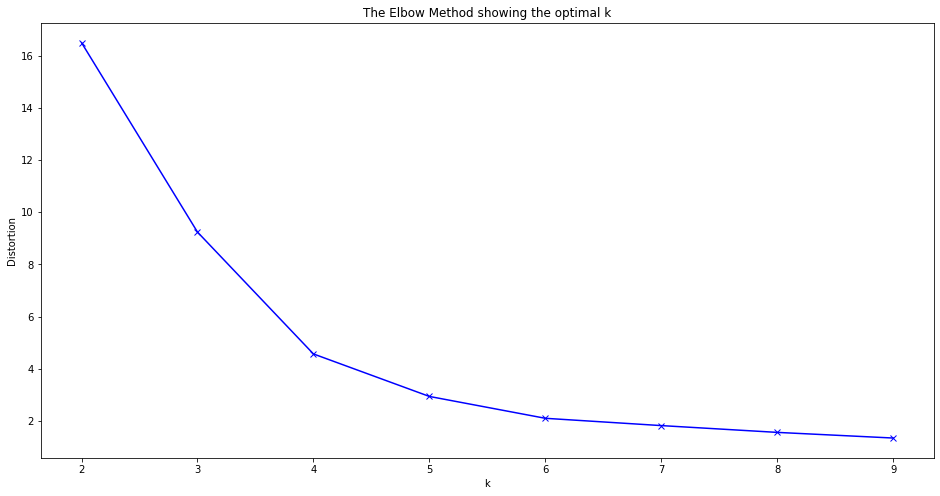

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Value of K in K-Means -> 4

# K Means

In [8]:
kmeans = cluster.KMeans(n_clusters=4 ,init="k-means++",random_state=200)
kmeans = kmeans.fit(df_scaled)

df['Clusters'] = kmeans.labels_
data['Clusters'] = kmeans.labels_


<ipython-input-8-8990ec14de49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = kmeans.labels_


In [9]:
data.groupby('Clusters').UNIQUE_KEY.count()

Clusters
0    198
1    850
2     41
3    391
Name: UNIQUE_KEY, dtype: int64

In [10]:
data.groupby('Clusters')['Total_Properties','Mean_Rating'].mean()

<ipython-input-10-4584a8c5d1dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Clusters')['Total_Properties','Mean_Rating'].mean()


,Total_Properties,Mean_Rating
Clusters,,
0,3.656566,11.103535
1,1.000000,2.932353
2,6.536585,21.439024
3,2.130435,6.072890


In [11]:
data.to_excel("Clustering_result_CensusTract.xlsx")